age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
   age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  \
0   63    1   3       145   233    1      150      0      2.3   0       1   
1   37    1   2       130   250    0      187      0      3.5   0       1   
2   41    0   1       130   204    0      172      0      1.4   0       1   
3   56    1   1       120   236    0      178      0      0.8   0       1   
4   57    0   0       120   354    0      163      1      0.6   0       1   

   restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  thal_3  
0      False      False    False    False    True   False   False  
1       True      False    False    False   False    True   False  
2      False      False    False     True   False    True   False  
3       True      False    False     True   False    Tru

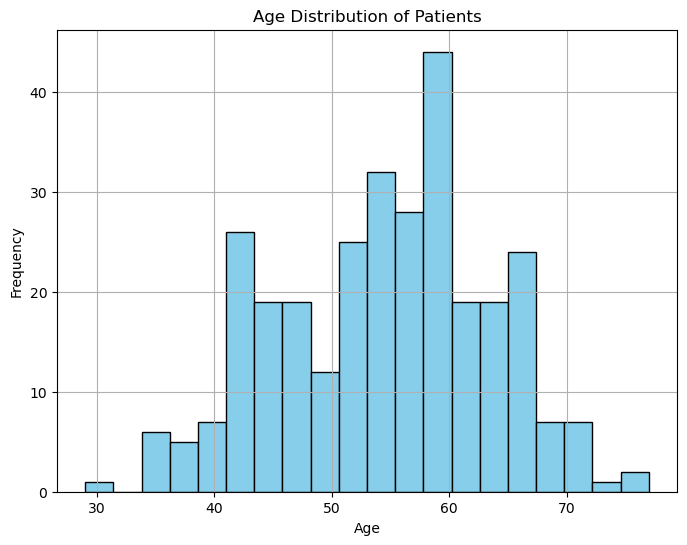

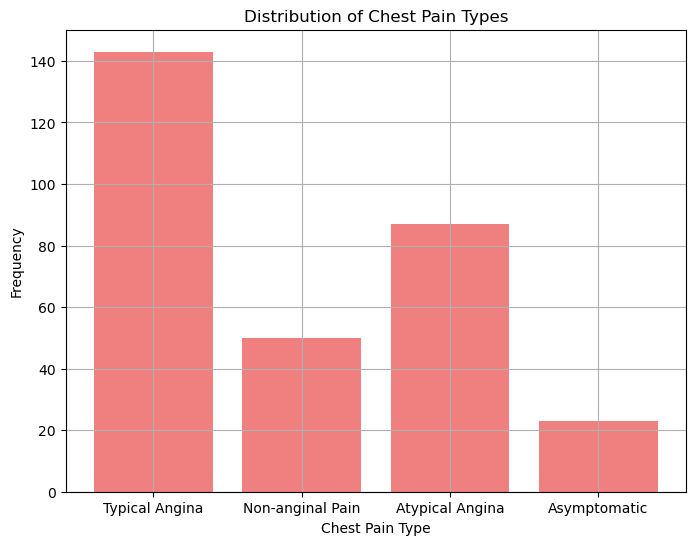

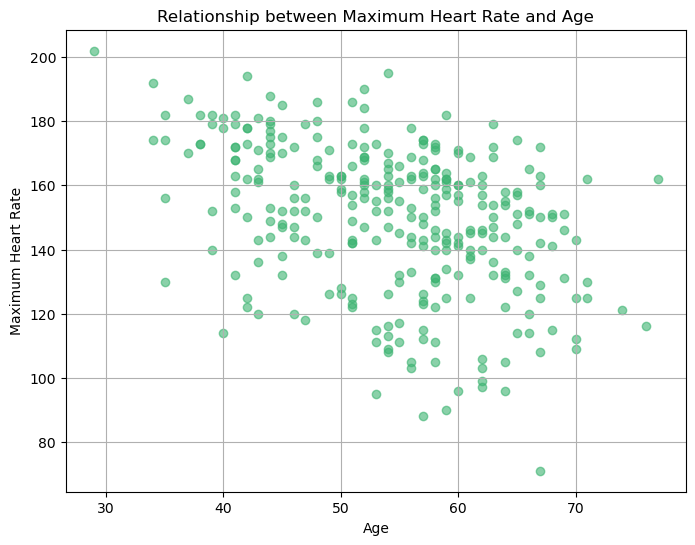

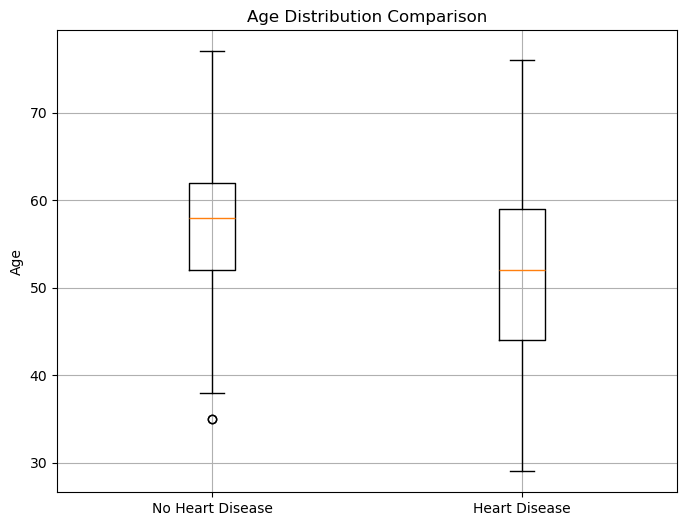

Correlation Matrix:
                age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex       -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp        -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps   0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol       0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs        0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
thalach   -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak    0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
ca         0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
target    -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   
restecg_1 -0.160654 -0.011940  0.070575 -0.146576 -0.174394 -0.066344   
restecg_2  0.084621 -0.107689 -

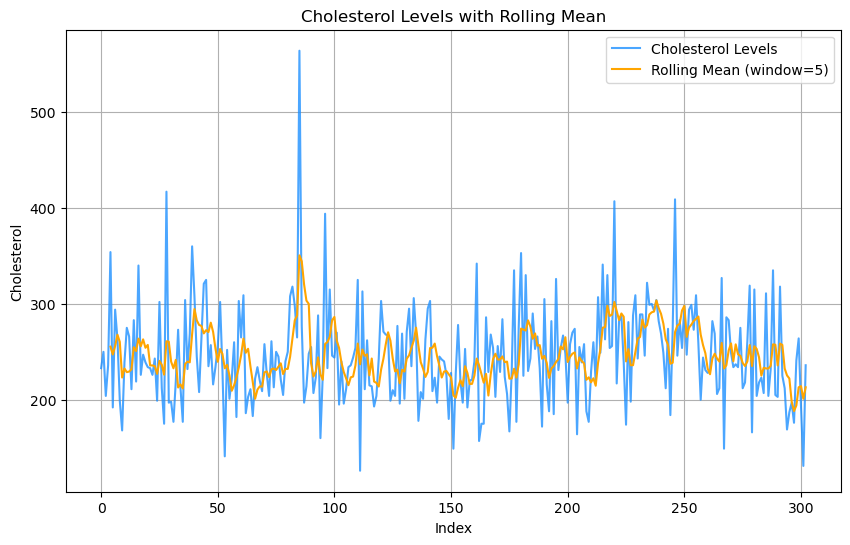

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart-disease.csv')

# Handle missing values (if any)
# Checking for missing values
print(df.isnull().sum())

# Convert categorical variables into dummy variables, keeping the original 'cp' column
df = pd.get_dummies(df, columns=['restecg', 'slope', 'thal'], drop_first=True)

# Display the first few rows of the dataframe
print(df.head())

# Calculate the average age of patients with and without heart disease
avg_age_heart_disease = df[df['target'] == 1]['age'].mean()
avg_age_no_heart_disease = df[df['target'] == 0]['age'].mean()
print(f"Average age of patients with heart disease: {avg_age_heart_disease:.2f}")
print(f"Average age of patients without heart disease: {avg_age_no_heart_disease:.2f}")

# Determine the distribution of chest pain types among patients
chest_pain_counts = df['cp'].value_counts() # Now 'cp' column should exist
print("Distribution of chest pain types:")
print(chest_pain_counts)

# Find the correlation between thalach (maximum heart rate) and age
correlation = df['thalach'].corr(df['age'])
print(f"Correlation between thalach and age: {correlation:.2f}")

# Analyze the effect of sex on the presence of heart disease
sex_heart_disease = df.groupby('sex')['target'].mean()
print("Effect of sex on the presence of heart disease:")
print(sex_heart_disease)
# Plot a histogram of the age distribution of patients
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a bar chart showing the distribution of chest pain types among patients
plt.figure(figsize=(8, 6))
plt.bar(chest_pain_counts.index, chest_pain_counts.values, color='lightcoral')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(chest_pain_counts.index, labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.grid(True)
plt.show()

# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalach'], color='mediumseagreen', alpha=0.6)
plt.title('Relationship between Maximum Heart Rate and Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.show()

# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['target'] == 0]['age'], df[df['target'] == 1]['age']], labels=['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution Comparison')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Calculate the correlation matrix for all numerical features in the dataset
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it
rolling_mean_chol = df['chol'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Cholesterol Levels', color='dodgerblue', alpha=0.8)
plt.plot(rolling_mean_chol, label='Rolling Mean (window=5)', color='orange')
plt.title('Cholesterol Levels with Rolling Mean')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid(True)
plt.show()
